<a href="https://colab.research.google.com/github/ardhiapp26/Tubes_KecerdasanBuatan/blob/main/Final%20Tubes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [20]:
import os

train_dir = "/content/gdrive/MyDrive/Dataset/Train"
vald_dir = "/content/gdrive/MyDrive/Dataset/Validation"

nangka_train_path = train_dir + "/Nangka"
sirih_train_path = train_dir + "/Sirih"

nangka_vald_path = vald_dir + "/Nangka"
sirih_vald_path = vald_dir + "/Sirih"

len_nangka_train = len(os.listdir(nangka_train_path))
len_sirih_train = len(os.listdir(sirih_train_path))
len_nangka_vald = len(os.listdir(nangka_vald_path))
len_sirih_vald = len(os.listdir(sirih_vald_path))

print("Panjang Dataset Training : ", len_nangka_train + len_sirih_train)
print("Panjang Dataset Validation : ", len_nangka_vald + len_sirih_vald)

print("\n")

print("Panjang Data Train Nangka : ", len_nangka_train)
print("Panjang Data Train Sirih : ", len_sirih_train)
print("Panjang Data Validation Nangka : ", len_nangka_vald)
print("Panjang Data Validation Sirih : ", len_sirih_vald)

Panjang Dataset Training :  100
Panjang Dataset Validation :  16


Panjang Data Train Nangka :  50
Panjang Data Train Sirih :  50
Panjang Data Validation Nangka :  8
Panjang Data Validation Sirih :  8


In [21]:
train_nangka_fnames = os.listdir(nangka_train_path)
train_sirih_fnames = os.listdir(sirih_train_path)

print(train_nangka_fnames[:10])
print(train_sirih_fnames[:10])

['006.jpg', '005.jpg', '004.jpg', '012.jpg', '011.jpg', '010.jpg', '009.jpg', '008.jpg', '007.jpg', '045.jpg']
['050.png', '036.png', '035.png', '039.png', '038.png', '034.png', '033.png', '032.png', '031.png', '037.png']


In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mping

nrows = 4
ncols = 4

pic_index = 0

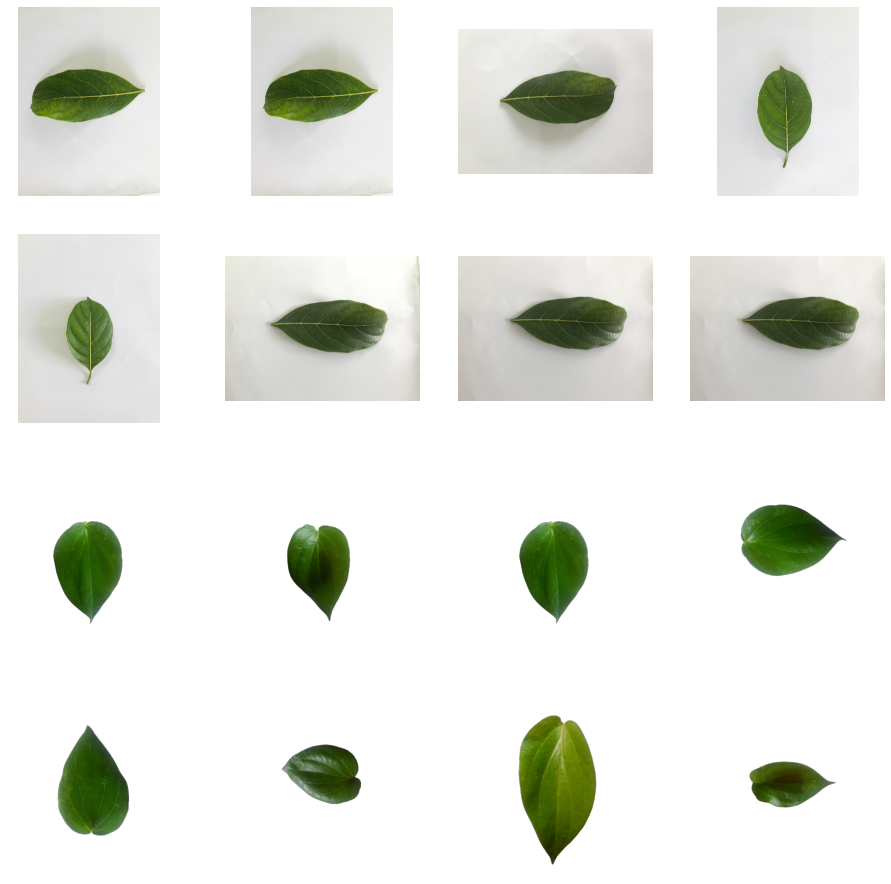

In [23]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_nangka_pix = [os.path.join(nangka_train_path, fname)
for fname in train_nangka_fnames[pic_index-8:pic_index]
]

next_sirih_pix = [os.path.join(sirih_train_path, fname)
for fname in train_sirih_fnames[pic_index-8:pic_index]
]

for i, img_path in enumerate(next_nangka_pix + next_sirih_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')

  img = mping.imread(img_path)
  plt.imshow(img)

plt.show()

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode=('nearest'),
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2
)
vald_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        batch_size=4,
        class_mode='binary',
        target_size=(150, 150)
)

validation_generator = vald_datagen.flow_from_directory(
        vald_dir,
        batch_size=4,
        class_mode='binary',
        target_size=(150, 150)
)


Found 100 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [26]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
    
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [30]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end (self,epoch,logs = {}):
    if(logs.get('accuracy') > 0.97):
      print("\n Akurasi mencapai > 97%")
      self.model.stop_training = True 

callbacks = myCallback()

In [31]:
from tensorflow.keras.optimizers import Adam

In [32]:
model.compile(loss='binary_crossentropy', 
              optimizer=tf.optimizers.Adam(), 
              metrics=['accuracy'])

In [33]:
history = model.fit( 
    train_generator,
    steps_per_epoch=6,
    epochs = 100,
    validation_data=validation_generator,
    validation_steps=3,
    verbose=2,
    callbacks = [callbacks]
    )

Epoch 1/100
6/6 - 15s - loss: 0.6783 - accuracy: 0.6667 - val_loss: 1.3082 - val_accuracy: 0.5000 - 15s/epoch - 2s/step
Epoch 2/100
6/6 - 8s - loss: 0.8137 - accuracy: 0.6667 - val_loss: 0.6160 - val_accuracy: 0.8333 - 8s/epoch - 1s/step
Epoch 3/100
6/6 - 5s - loss: 0.2000 - accuracy: 0.9583 - val_loss: 0.1060 - val_accuracy: 1.0000 - 5s/epoch - 818ms/step
Epoch 4/100
6/6 - 5s - loss: 0.1068 - accuracy: 0.9583 - val_loss: 0.4076 - val_accuracy: 0.9167 - 5s/epoch - 857ms/step
Epoch 5/100
6/6 - 3s - loss: 0.4026 - accuracy: 0.9583 - val_loss: 1.3271 - val_accuracy: 0.8333 - 3s/epoch - 571ms/step
Epoch 6/100

 Akurasi mencapai > 97%
6/6 - 3s - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.2708 - val_accuracy: 0.9167 - 3s/epoch - 544ms/step


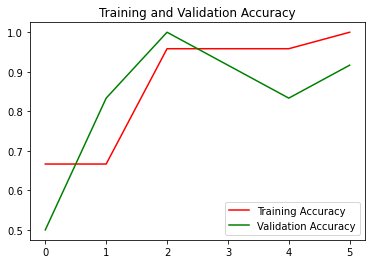

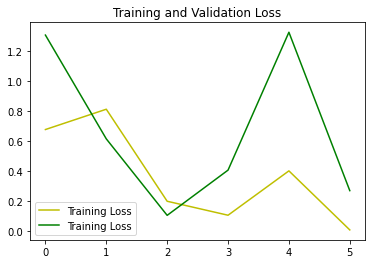

<Figure size 432x288 with 0 Axes>

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot (epochs, val_acc, 'g', label = 'Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'y', label = 'Training Loss')
plt.plot(epochs, val_loss, 'g', label = 'Training Loss')
plt.title("Training and Validation Loss")
plt.legend(loc=0)
plt.figure()

plt.show()

Saving 1.jpg to 1 (1).jpg
1.jpg
Daun Nangka


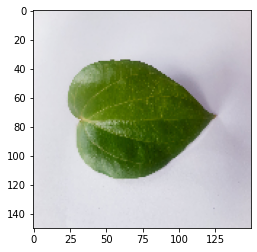

In [36]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=4)

  print (fn)
  if classes==0:
      print('Daun Nangka')
  else :
      print('Daun Sirih')
